#### Store polynom coeffs for fitted func

You can store polynomial func coeffs you got from fitted func.  
Polynomial coeffs will be stored in a xlsx file in folder  

>>> /Inputs/fittedpolycoeffs/n.xlsx

with n as number assigned to each fitted func (pick however you like)


/////////////////////////////////////  
assign the polynomisl coeffs to **`p[i][j]`** like this,

![](pasteImage/2022-08-03-00-23-44.png)

where i is index of power of flow coeffs and j is index of power of work coeffs

In [ ]:
import numpy as np
from datetime import datetime

# input 
n = 0    # => INPUT which number to assign to saved .csv
cyclenum =0      # => INPUT for which cycle number this is
gparamsetnum =0      # => INPUT which gparamset was used
rpm = 30000
whichcomputeR =0 
now=datetime.now()
inputtime= now.strftime("%d-%m-%Y %H:%M")
# careful not to assign used n as it would overwrite csv already stored csv
global p
p = np.zeros(shape=(6,6))
# assign i and j 
# example :
p[0][0] =      -285.9
p[1][0] =       -56.2
p[0][1] =       162.2
p[2][0] =      -89.08
p[1][1] =       37.96
p[0][2] =      -29.07
p[3][0] =      -55.04
p[2][1] =       50.69
p[1][2] =      -12.32
p[0][3] =       3.039
p[4][0] =      -7.265
p[3][1] =       15.04
p[2][2] =      -8.523
p[1][3] =       1.677
p[0][4] =     -0.1986
p[5][0] =      0.5554
p[4][1] =     -0.2706
p[3][2] =      -0.361
p[2][3] =      0.2681
p[1][4] =    -0.05467
p[0][5] =    0.005047
# //// \\\\




run cell below to store p into new **`n.xlsx`**

In [ ]:
import shutil
from ifrturbinepackage.definitions import *
import os
import pandas as pd
from openpyxl import load_workbook
from datetime import datetime

template = os.path.join(ROOT_DIR,"Inputs","fittedpolycoeffs","template.xlsx")
new = os.path.join(ROOT_DIR,"Inputs","fittedpolycoeffs",f"{n}.xlsx")
shutil.copyfile(template,new)
dfcoeff=pd.DataFrame(p)
dfcoeff.head()
# writer= pd.ExcelWriter(new, engine='openpyxl')
wb  =load_workbook(new)
ws  = wb['COEFFS']
for i in range(0,6):
    for j in range(0,6):
        ws.cell(i+3,j+2).value=p[i][j]
        
ws  = wb['INFO']
j=0
for i in [cyclenum,gparamsetnum,rpm,whichcomputeR,inputtime]:
    j=j+1
    ws.cell(2,j).value=i
wb.save(new)

#### Get Eff & Visualize fitted functions in contour plot

you can get fitted efficiency value for specific `[flow coeff,work coeff]` and also plot any stored fitted functions in contour plot.  
*You don't have to run previous cells if you have already stored it before. Just input value `n` in cells below*

##### Get Eff

In [ ]:
from ifrturbinepackage.inputs import *
from ifrturbinepackage.rotor import *
from ifrturbinepackage.definitions import *
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
n     = 0           # INPUT => which fitted func to use
tenflowcoeff=       # INPUT => what 10 x flow coeff
tenworkcoeff=       # INPUT => what 10 x work coeff
Effts = fiteffts(tenflowcoeff,tenworkcoeff,n)
print(f"10*flow_coeff = {tenflowcoeff}")
print(f"10*work_coeff = {tenworkcoeff}")
print(f"Total-to-Static Efficiency = {Effts}")

##### Get contour plot

In [ ]:
dffitfun = pd.read_excel(os.path.join(ROOT_DIR,"Inputs","fittedpolycoeffs",f"{n}.xlsx"),engine='openpyxl',skiprows=1,usecols=range(1,7),header=0,index_col=False)
dffitfun.tail()

In [ ]:
from ifrturbinepackage.inputs import *
print(whichfitfun(0))


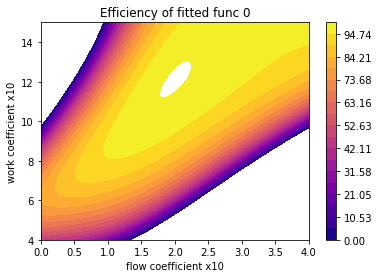

In [1]:
n   = 0             # INPUT => which fitted func to plot
from ifrturbinepackage.rotor import *
import matplotlib.pyplot as plt
import numpy as np

wcoeff  = np.linspace(4,15,100)
fcoeff  = np.linspace(0,4,100)
X, Y    = np.meshgrid(fcoeff, wcoeff)
Z       = fiteffts(X,Y,n)

fig,ax=plt.subplots(1,1)
# figure(figsize=(10, 10))
plot1 = ax.contourf(X, Y, Z,levels=np.linspace(0,100,20),cmap='plasma')
fig.colorbar(plot1) # Add a colorbar to a plot
ax.set_title(f"Efficiency of fitted func {n}")
ax.set_xlabel("flow coefficient x10")
ax.set_ylabel("work coefficient x10")
plt.show()